In [1]:
import sys

In [1]:
from table_crew import TableCrew

# 해시 가능한 딕셔너리(FrozenDict) 클래스 정의 (재귀적으로 변환)
class FrozenDict(dict):
    def __hash__(self):
        return hash(tuple(sorted((k, self._make_hashable(v)) for k, v in self.items())))
    
    def _make_hashable(self, value):
        if isinstance(value, dict):
            return FrozenDict(value)
        elif isinstance(value, list):
            return tuple(self._make_hashable(item) for item in value)
        return value

# TableCrew 클래스 인스턴스 생성
crew_instance = TableCrew()

# kickoff 시에 전달할 입력 데이터 구성 (예시)
sample_input = FrozenDict({
    "query": "크래프톤의 매출액와 순수익의 변화지표는 어떻게되?",
    "paragraphs": FrozenDict({
        "paragraph": [],
        "file_name": []
    }),
    "images": FrozenDict({
        "image": [],
        "summary": [],
        "file_name": []
    }),
    "tables": FrozenDict({
        # {tables[table]}에 해당하는 데이터 (리스트 형태)
        "table": ["""| 구분       | 변경전          | 변경후          | 변동률          | 변동사유                                      |
|------------|----------------|----------------|----------------|----------------------------------------------|
|            | 2024F  | 2025F  | 2024F  | 2025F  | 2024F  | 2025F  |                                              |
| 매출액     | 2,193  | 2,507  | 2,192  | 2,597  | 0%     | 4%     |                                              |
| 영업이익   | 822    | 970    | 801    | 1,029  | -3%    | 6%     |                                              |
| 순이익     | 678    | 787    | 740    | 840    | 9%     | 7%     |                                              |
| 영업이익률 | 37.5%  | 38.7%  | 36.5%  | 39.6%  | -      | -      |                                              |
| 순이익률   | 30.9%  | 31.4%  | 33.0%  | 32.3%  | -      | -      |                                              |"""],
        # {tables[summary]}에 해당하는 설명 (리스트 형태)
        "summary": ["이 표는 크래프톤에 대하여 미래에셋증권의 2024년 및 2025년 실적 추정치 변화를 나타내며, 매출액, 영업이익, 순이익 등의 변동을 보여줍니다."],
        # 파일 이름도 필요하면 추가 (여기서는 빈 리스트로 처리)
        "file_name": []
    })
})

# Crew의 kickoff 메서드를 통해 전체 프로세스를 실행합니다.
# before_kickoff를 통해 입력 데이터를 전처리합니다.
kickoff_data = crew_instance.before_kickoff_function(sample_input)

# Crew 인스턴스 생성 (인자를 받지 않으므로 괄호만 사용)
crew_obj = crew_instance.table_crew()

# 생성된 Crew 인스턴스의 kickoff 메서드를 호출하여 전체 프로세스를 실행합니다.
result = crew_obj.kickoff(kickoff_data)

print("kickoff 실행 결과:", result)

LLM value is a string
LLM value is a string
LLM value is a string
# Agent: 시각화 그래프 코드 생성자
## Task: 주어진 마크다운 테이블을 활용하여 사용자의 질문에 가장 도움이 되는 깔끔하고 세련된 시각화 코드를 작성 코드는 반드시 파이썬의 문법에 맞게 작성되어야 함 시각화 라이브러리는 matplot 과 seaborn 을 같이 사용해야 함 NanumGothic폰트를 seaborn 에 적용시 sns.set_theme(font='NanumGothic') 로 등록해야 한다. 코드에는 반드시 'output' 폴더에 결과물을 저장하는 로직이 포함돼 있어야 함 결과물의 이름은 사용자가 알아볼 수 있는 이름의 png파일로 저장될 수 있어야 함 만약 질문과 관계없는 테이블일 경우, 아무것도 출력하지 않아야 함 질문: 크래프톤의 매출액와 순수익의 변화지표는 어떻게되? 테이블: ['| 구분       | 변경전          | 변경후          | 변동률          | 변동사유                                      |\n|------------|----------------|----------------|----------------|----------------------------------------------|\n|            | 2024F  | 2025F  | 2024F  | 2025F  | 2024F  | 2025F  |                                              |\n| 매출액     | 2,193  | 2,507  | 2,192  | 2,597  | 0%     | 4%     |                                              |\n| 영업이익   | 822    | 970    | 801    | 1,029  | -3%    | 6%     |                    

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set the font
sns.set_theme(font='NanumGothic')
# 데이터 준비
data = {
    '연도': ['2022.12', '2023.12', '2024.12E', '2025.12E', '2026.12E'],
    '매출액(십억원)': [8220, 9671, 10676, 11774, 12925],
    '순이익(십억원)': [673, 985, 1821, 1841, 2125]
}
df = pd.DataFrame(data)
# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='연도', y='매출액(십억원)', marker='o', label='매출액')
sns.lineplot(data=df, x='연도', y='순이익(십억원)', marker='o', label='순이익')
# 그래프 제목과 레이블 설정
plt.title('네이버 매출액 및 순이익 변화')
plt.xlabel('연도')
plt.ylabel('금액 (십억원)')
plt.legend(title='지표')
plt.grid(True)
# 결과 저장
plt.savefig('output/naver_revenue_profit.png', dpi=300)
plt.close()


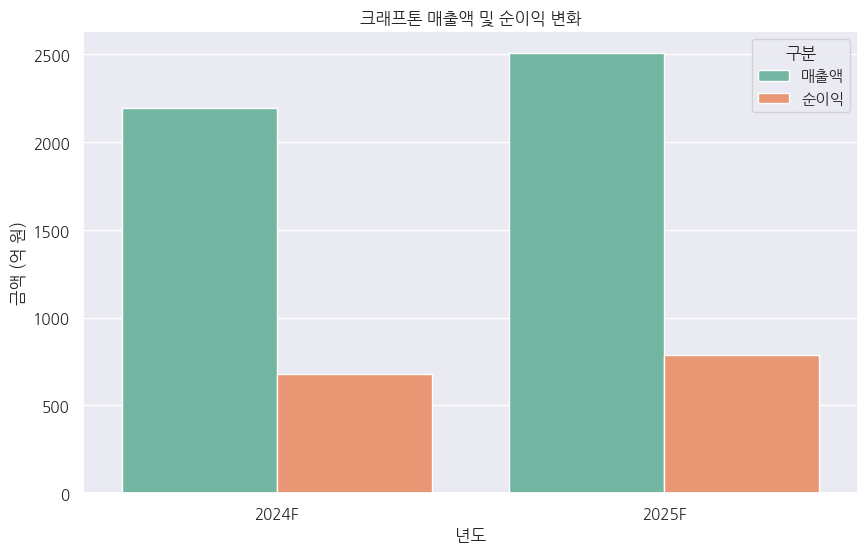

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 폰트 설정
sns.set_theme(font='NanumGothic')
# 데이터 생성
data = {
    '구분': ['매출액', '순이익'],
    '2024F': [2193, 678],
    '2025F': [2507, 787]
}
df = pd.DataFrame(data)
# 데이터 변환
df_melt = df.melt(id_vars='구분', var_name='년도', value_name='금액')
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, x='년도', y='금액', hue='구분', palette='Set2')
plt.title('크래프톤 매출액 및 순이익 변화')
plt.xlabel('년도')
plt.ylabel('금액 (억 원)')
plt.legend(title='구분')
# 결과 저장
plt.savefig('output/Krafton_Revenue_Profit_Change.png')
plt.show()


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# NanumGothic 폰트 설정
sns.set_theme(font='NanumGothic')
# 데이터프레임 생성
data = {
    '구분': ['매출액', '순이익'],
    '2024F': [2193, 678],
    '2025F': [2507, 787]
}
df = pd.DataFrame(data)
# 변형을 위한 melt
df_melted = df.melt(id_vars='구분', var_name='연도', value_name='금액')
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='연도', y='금액', hue='구분')
plt.title('크래프톤의 매출액과 순수익 변화')
plt.xlabel('년도')
plt.ylabel('금액 (억원)')
plt.legend(title='항목')
plt.tight_layout()
# 파일 저장
plt.savefig('output/크래프톤_매출액과_순수익_변화.png')
plt.close()
